In [1]:
import pandas as pd

import re
import string
import nltk

from string import punctuation
from nltk.corpus import stopwords

stop_words = stopwords.words('indonesian')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

from sklearn.model_selection import train_test_split
from sklearn import svm, naive_bayes
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
bisnis=pd.read_csv('bisnis.csv')
lifestyle=pd.read_csv('lifestyle.csv')
sport=pd.read_csv('sport.csv')

In [3]:
#make target label
bisnis['label']='bisnis'
lifestyle['label']='lifestyle'
sport['label']='sport'

In [4]:
#combine data
df = pd.concat([bisnis,lifestyle,sport],ignore_index=True)
df

,Unnamed: 0,id,url,title,content,label
0,0,0,https://www.tribunnews.com/bisnis/2020/10/06/s...,\n\t\t\t\t\t\tSektor Pertanian Tumbuh Signifik...,"b'TRIBUNNEWS.COM, JAKARTA -- Pemerintah optimi...",bisnis
1,1,1,https://www.tribunnews.com/bisnis/2020/10/06/t...,\n\t\t\t\t\t\tTekan Jokowi Soal UU Cipta Kerja...,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",bisnis
2,2,2,https://www.tribunnews.com/bisnis/2020/10/06/c...,\n\t\t\t\t\t\tCara Dapatkan Listik Gratis Bula...,b'TRIBUNNEWS.COM - Masyarakat Indonesia dapat ...,bisnis
3,3,3,https://www.tribunnews.com/bisnis/2020/10/06/p...,\n\t\t\t\t\t\tPerbandingan UU Cipta Kerja yang...,"b'TRIBUNNEWS.COM, JAKARTA -\xc2\xa0 Pemerintah...",bisnis
4,4,4,https://www.tribunnews.com/bisnis/2020/10/06/p...,\n\t\t\t\t\t\tProtes Risiko Lingkungan di UU C...,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",bisnis
...,...,...,...,...,...,...
115,35,35,https://www.tribunnews.com/sport/2020/10/05/li...,"\n\t\t\t\t\t\tLive Streaming TV Online Trans7,...","b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",sport
116,36,36,https://www.tribunnews.com/sport/2020/10/05/li...,"\n\t\t\t\t\t\tLive Streaming Trans7, MotoGP Pr...","b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",sport
117,37,37,https://www.tribunnews.com/sport/2020/10/05/li...,"\n\t\t\t\t\t\tLive Streaming TV Online Trans7,...","b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",sport
118,38,38,https://www.tribunnews.com/sport/2020/10/05/li...,"\n\t\t\t\t\t\tLive Streaming Trans7, MotoGP 20...","b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",sport


In [5]:
#remove kolom Id,Acara TV',Jumlah Retweet
df.drop(['Unnamed: 0','id','url','title'], axis=1, inplace=True)

In [6]:
df.groupby('label').count()

,content
label,
bisnis,40
lifestyle,40
sport,40


In [7]:
data = df.copy()
data

,content,label
0,"b'TRIBUNNEWS.COM, JAKARTA -- Pemerintah optimi...",bisnis
1,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",bisnis
2,b'TRIBUNNEWS.COM - Masyarakat Indonesia dapat ...,bisnis
3,"b'TRIBUNNEWS.COM, JAKARTA -\xc2\xa0 Pemerintah...",bisnis
4,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",bisnis
...,...,...
115,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",sport
116,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",sport
117,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",sport
118,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",sport


Stopwords + Sastrawi

In [8]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

addOnStopwords = ['btribunnewscom']
factory = StopWordRemoverFactory()
stopwordSastrawi = factory.get_stop_words()
stop_words=stop_words+stopwordSastrawi+addOnStopwords

In [18]:
stop_words

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [9]:
#preprocessing function
def preprocessing(sentence):
    
    #lowecasing
    sentence = sentence.lower()
    
    #remove white spaces
    sentence = sentence.strip()
    
    #tokenization
    words = sentence.split()
    
    #remove punctuation/ special character
    remove_table = str.maketrans("", "", punctuation)
    words = [x.translate(remove_table) for x in words]
    
    #remove nonalphanumeric <=3 chars
    words = [x for x in words if x.isalnum() and len(x) > 3]
    #stemming
    words=[stemmer.stem(w) for w in words]
    #remove stopwords
    words = [x for x in words if x not in stop_words ]
    #rejoining the words
    sentence = " ".join(words)
    
    return sentence

In [11]:
data['content'] = [preprocessing(stc) for stc in data['content']]

In [13]:
data['content']

0      jakarta perintah optimistis sektor tani sangga...
1      blaporan wartawan tribunnewscom yanuar riezqi ...
2      masyarakat indonesia nikmat token listrik grat...
3      jakarta xc2xa0 perintah resmi kesah omnibus ra...
4      blaporan wartawan tribunnewscom yanuar riezqi ...
                             ...                        
115    ajang balap motogp 2020 gelar pekan minggu 111...
116    ajang balap motogp 2020 gelar pekan minggu 111...
117    ajang balap motogp 2020 gelar pekan minggu 111...
118    ajang balap motogp 2020 gelar pekan minggu 111...
119    ajang balap motogp 2020 gelar pekan minggu 111...
Name: content, Length: 120, dtype: object

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['label'], test_size=0.25, random_state=10)

In [15]:
cv = CountVectorizer()
X_train_vect = cv.fit_transform(X_train)
X_test_vect = cv.transform(X_test)

# SVM Model

In [16]:
#modelling with svm
SVM = svm.SVC()
SVM.fit(X_train_vect, y_train)

SVC()

In [19]:
predicted_SVM1 = SVM.predict(X_test_vect)

## First Evaluation

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

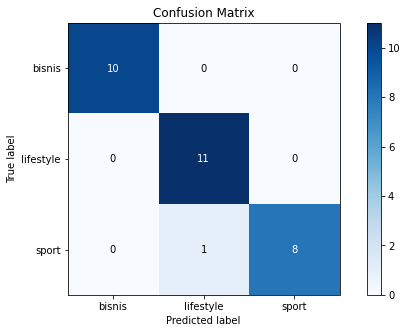

In [20]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    predicted_SVM1,
    figsize=(10,5))

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_SVM1))

              precision    recall  f1-score   support

      bisnis       1.00      1.00      1.00        10
   lifestyle       0.92      1.00      0.96        11
       sport       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## Hyperparameter Tuning with GridSearchCV and Evaluation

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

# defining parameter range 
param_grid_SVM = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
grid_SVM = GridSearchCV(SVC(), param_grid_SVM, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_SVM.fit(X_train_vect, y_train) 
 
# print best parameter after tuning 
print(grid_SVM.best_params_) 
grid_predictions_SVM = grid_SVM.predict(X_test_vect) 
   
# print classification report 
print(classification_report(y_test, grid_predictions_SVM)) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

      bisnis       1.00      0.90      0.95        10
   lifestyle       0.92      1.00      0.96        11
       sport       1.00      1.00      1.00         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.4s finished


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

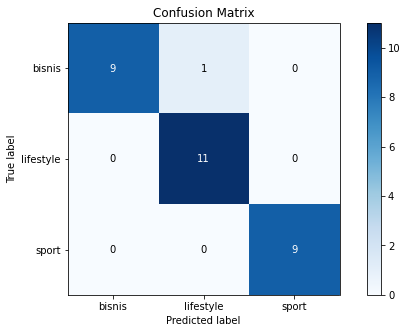

In [23]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    grid_predictions_SVM,
    figsize=(10,5))

# ANN

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,),(50,)],
    'activation': ['sigmoid','tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.01, 0.0005]
}
clf = GridSearchCV(mlp_gs, parameter_space,refit=True, n_jobs=-1, cv=5)
clf.fit(X_train_vect, y_train) 
print('Best parameters found:\n', clf.best_params_)

clf_prediction = clf.predict(X_test_vect) 
   
# print classification report 
print(classification_report(y_test, clf_prediction)) 

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
              precision    recall  f1-score   support

      bisnis       1.00      1.00      1.00        10
   lifestyle       1.00      1.00      1.00        11
       sport       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [46]:
berita_sport=pd.Series('Meski pencapaiannya sama dengan torehannya di Olimpiade Rio de Janeiro 2016 lalu, namun masyarakat Indonesia patut berbangga pada ayah dua anak ini, atas perjuangannya mengibarkan bendera Indonesia di kancah internasional.')

In [41]:
berita_bisnis=pd.Series('TRIBUNNEWS.COM, JAKARTA - Melanjutkan rangkaian kegiatan mendorong ekspor, Direktorat Jenderal Bea Cukai Kementerian Keuangan (Kemenkeu) bersama instansi terkait berupaya untuk merevitalisasi ekspor UMKM.')

In [47]:
berita = [preprocessing(stc) for stc in berita_sport]

In [48]:
berita_vect = cv.transform(berita)

In [49]:
svm_berita=grid_SVM.predict(berita_vect)

In [50]:
svm_berita

array(['lifestyle'], dtype=object)

In [44]:
berita_prediction = clf.predict(berita_vect)

In [45]:
berita_prediction

array(['bisnis'], dtype='<U9')

In [51]:
rf_pred = clf_randomforest.predict(berita_vect)

In [52]:
rf_pred

array(['lifestyle'], dtype=object)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

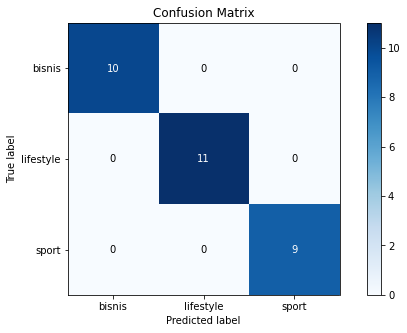

In [27]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    clf_prediction,
    figsize=(10,5))

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()

param_grid = { 
    'n_estimators': [100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf_randomforest = GridSearchCV(randomforest, param_grid=param_grid,refit=True, cv= 5)

clf_randomforest.fit(X_train_vect, y_train) 
print('Best parameters found:\n', clf_randomforest.best_params_)

clf_prediction_randomforest = clf_randomforest.predict(X_test_vect) 
   
# print classification report 
print(classification_report(y_test, clf_prediction_randomforest)) 

Best parameters found:
 {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 100}
              precision    recall  f1-score   support

      bisnis       1.00      0.90      0.95        10
   lifestyle       0.85      1.00      0.92        11
       sport       1.00      0.89      0.94         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

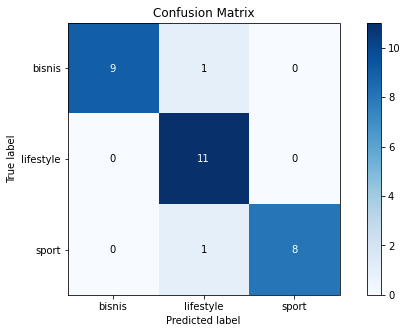

In [29]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    clf_prediction_randomforest,
    figsize=(10,5))